# ATKEMPER4
### reward_comparison_max_10.csv
stop condition: max simulation_count = 10
### reward_comparison_max_20.csv
for all sqls in job:\
stop condition: `same_order_count>=5 || simulation_count>=20`

|branch|file|Done?|
|---|---|---|
|option-2-smaller-chunk-20|raw-20|Done|
|execution-chunk-simu-reward-a|raw-20|Done|
|execution-chunk-simu-reward-b|raw-20|Done|
|execution-chunk-simu-reward-c|raw-20|Done|
|execution-chunk-simu-reward-d|raw-20|Done|
|execution-chunk-sim-reward-e|raw-20|Done|

# TODO:
放到论文上的时候注意标号是不一样的

|branch|file|
|---|---|
|SkinnerDB20|A|
|A20|B|
|B20|C|
|C20|D|
|D20|E|
|E20|F|

In [1]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib
import math
import pylab
import seaborn as sns

In [2]:
cwd = os.getcwd()
cwd

'/Users/chuyinghe/Documents/duckdb-visualization/data/ATKEMPER4'

In [3]:
csv = cwd + '/reward_comparison_max_20.csv'
data = pd.read_csv(csv)  
data.shape

(5443, 7)

# TOTAL TIME

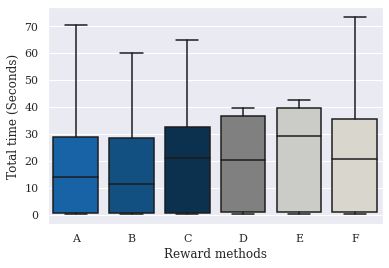

In [5]:
tum_colors = ['#0065BD', '#005293', '#003359',  
              '#808080', '#CCCCC6', '#DAD7CB']
# '#333333','#98C6EA', '#64A0C8'
# plt.rcParams["figure.figsize"] = (15,15)
sns.set_theme(font='serif')

# ax = sns.boxplot(x="optimizer", y=np.power(data["total_time"],4), data=data, palette = tum_colors)
# turn milliseconds to seconds
ax = sns.boxplot(x="optimizer", y=data["total_time"]/1000, data=data, palette = tum_colors, showfliers=False)
ax.set(xlabel='Reward methods', ylabel='Total time (Seconds)')
plt.savefig('rewards.pdf')

## A

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

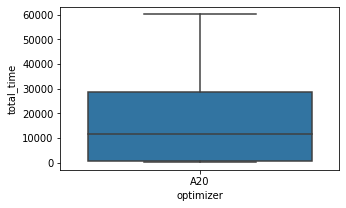

In [5]:
plt.rcParams["figure.figsize"] = (5, 3)

data_a = data[ data['optimizer'].isin(['A','A20','A30']) ]
sns.boxplot(x="optimizer", y="total_time", data=data_a, showfliers=False)
# A20
#data_a[data_a['query'] == '3b.sql']
# A: 3-1-2-0-,0-2-3-1-
# A20: 0-2-3-1-
# A30: 0-2-3-1-

## B

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

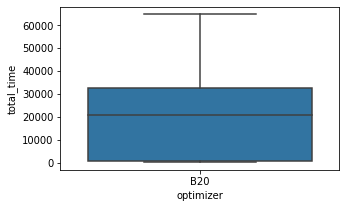

In [6]:
plt.rcParams["figure.figsize"] = (5, 3)

data_a = data[ data['optimizer'].isin(['B','B20','B30']) ]
sns.boxplot(x="optimizer", y="total_time", data=data_a, showfliers=False)
# B20

## C

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

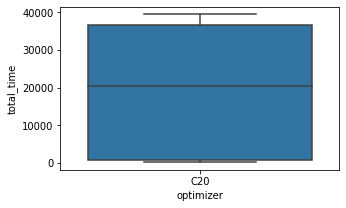

In [7]:
plt.rcParams["figure.figsize"] = (5, 3)

data_a = data[ data['optimizer'].isin(['C','C20','C30']) ]
sns.boxplot(x="optimizer", y="total_time", data=data_a, showfliers=False)
# C30 = C20

## Skinner

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

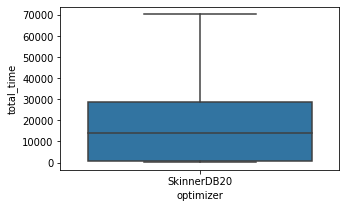

In [8]:
plt.rcParams["figure.figsize"] = (5, 3)

data_a = data[ data['optimizer'].isin(['SkinnerDB','SkinnerDB20','SkinnerDB30']) ]
sns.boxplot(x="optimizer", y="total_time", data=data_a, showfliers=False)
# 

['SkinnerDB20' 'A20' 'B20' 'C20']
duck.mean =  nan
duck.mean =  9606.284523809523


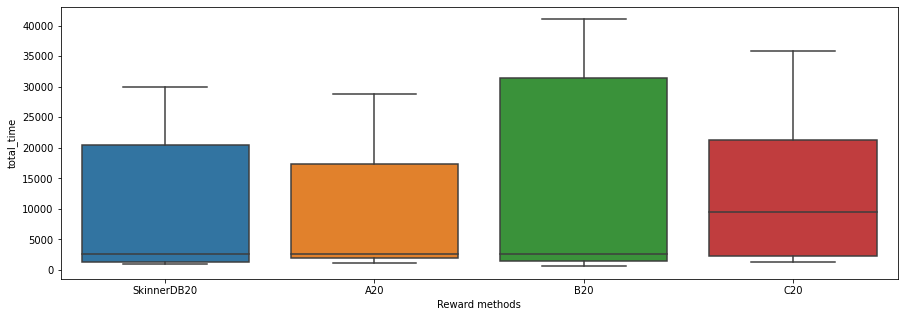

In [9]:
plt.rcParams["figure.figsize"] = (15, 5)

data_better = data[ data['optimizer'].isin(['SkinnerDB','SkinnerDB30','SkinnerDB20', 
                                            'C20', 'B20', 'A20', 'DuckDB']) ]
data_better = data_better[ data_better['query'].isin(['3b.sql', '9d.sql', '20b.sql', '16d.sql']) ]

ax = sns.boxplot(x="optimizer", y="total_time", data=data_better, showfliers=False)
#ax = sns.boxplot(x="optimizer", y="total_time", data=data_better)
ax.set(xlabel='Reward methods', ylabel='total_time')

print(data_better['optimizer'].unique())
print("duck.mean = ", data_better[data_better['optimizer']=='DuckDB']['total_time'].mean())
print("duck.mean = ", data_better[data_better['optimizer']=='A20']['total_time'].mean())
#data[ data['optimizer'] == 'SkinnerDB20' ]

## 3b.sql

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

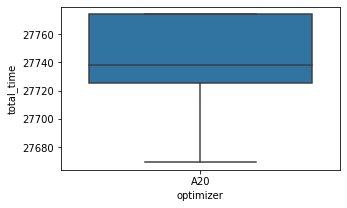

In [10]:
# 3b.sql', '9d.sql', '20b.sql', '16d.sql
plt.rcParams["figure.figsize"] = (5, 3)

d_3b = data_better[ data_better['query'] =='3b.sql' ]
d_3b = d_3b[ d_3b['optimizer'].isin(['DuckDB', 'SkinnerDB', 'A20'])]
sns.boxplot(x="optimizer", y="total_time", data=d_3b, showfliers=False)

## 9d.sql

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

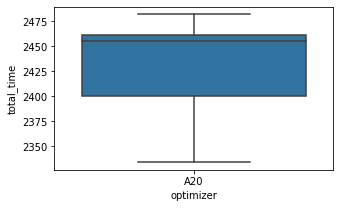

In [11]:
plt.rcParams["figure.figsize"] = (5, 3)

d_3b = data_better[ data_better['query'] =='9d.sql' ]
d_3b = d_3b[ d_3b['optimizer'].isin(['DuckDB', 'SkinnerDB', 'A20'])]
sns.boxplot(x="optimizer", y="total_time", data=d_3b, showfliers=False)

## 20b.sql

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

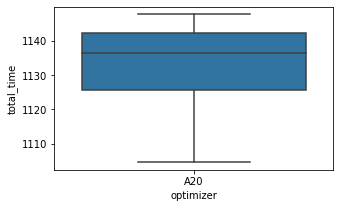

In [12]:
plt.rcParams["figure.figsize"] = (5, 3)

d_3b = data_better[ data_better['query'] =='20b.sql' ]
d_3b = d_3b[ d_3b['optimizer'].isin(['DuckDB', 'SkinnerDB', 'A20'])]
sns.boxplot(x="optimizer", y="total_time", data=d_3b, showfliers=False)

## 16d.sql

<AxesSubplot:xlabel='optimizer', ylabel='total_time'>

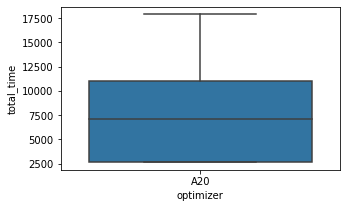

In [13]:
plt.rcParams["figure.figsize"] = (5, 3)

d_3b = data_better[ data_better['query'] =='16d.sql' ]
# d_3b = d_3b[ d_3b['optimizer'].isin(['DuckDB', 'SkinnerDB', 'A20'])]
d_3b = d_3b[ d_3b['optimizer'].isin(['DuckDB', 'A20'])]
sns.boxplot(x="optimizer", y="total_time", data=d_3b, showfliers=False)

# PREPARATION TIME

[Text(0.5, 0, 'Reward methods'), Text(0, 0.5, 'prep_time')]

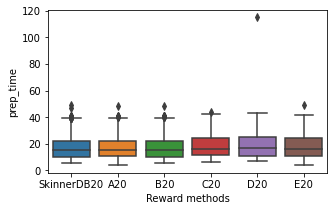

In [14]:
ax = sns.boxplot(x="optimizer", y=data["prep_time"], data=data)
ax.set(xlabel='Reward methods', ylabel='prep_time')

# EXECUTION TIME

In [15]:
# ax = sns.boxplot(x="optimizer", y=data["exec_time"], data=data)
ax.set(xlabel='Reward methods', ylabel='exec_time')

[Text(0.5, 17.200000000000003, 'Reward methods'),
 Text(18.106250000000003, 0.5, 'exec_time')]

# MAX & MIN

ValueError: max() arg is an empty sequence

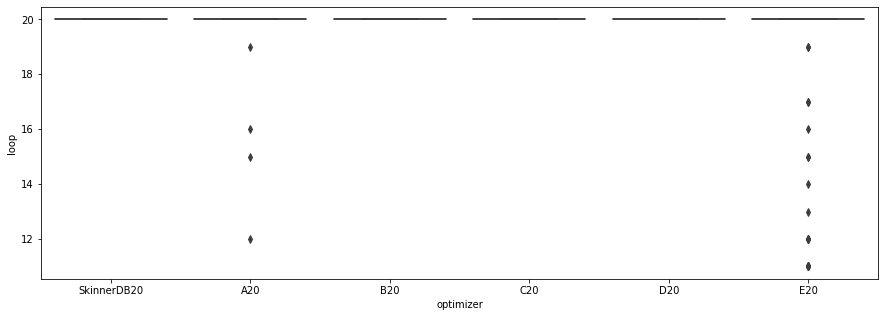

In [16]:
plt.rcParams["figure.figsize"] = (15,5)


sns.boxplot(x="optimizer", y="loop", data=data)
#print(max(data[data['optimizer'] == 'O']['loop']), 
#      min(data[data['optimizer'] == 'O']['loop']))

print(max(data[data['optimizer'] == 'A']['loop']), 
      min(data[data['optimizer'] == 'A']['loop']))

print(max(data[data['optimizer'] == 'B']['loop']), 
      min(data[data['optimizer'] == 'B']['loop']))

print(max(data[data['optimizer'] == 'C']['loop']), 
      min(data[data['optimizer'] == 'C']['loop']))

print(max(data[data['optimizer'] == 'D']['loop']), 
      min(data[data['optimizer'] == 'D']['loop']))

print(max(data[data['optimizer'] == 'E']['loop']), 
      min(data[data['optimizer'] == 'E']['loop']))

# AVERAGE

In [ ]:
# avg:
reward_methods = data['optimizer'].unique()
reward_methods

reward_avg = pd.DataFrame(columns=['reward_method', 'avg_total_time'])

for reward in reward_methods:
    avg_total = data[data['optimizer'] == reward]['total_time'].mean()
    avg_prep = data[data['optimizer'] == reward]['prep_time'].mean()
    avg_exec = data[data['optimizer'] == reward]['exec_time'].mean()

    dict = {'reward_method': reward, 'avg_total_time': avg_total, 
            'avg_prep_time': avg_prep, 'avg_exec_time': avg_exec}
    reward_avg = reward_avg.append(dict, ignore_index = True)

In [ ]:
# | reward | avg_total |
reward_avg

# Displot

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

# sns.displot(data[data['optimizer'] == 'SkinnerDB_A']['loop'])
# sns.displot(data[data['optimizer'] == 'SkinnerDB_B']['loop'])
# sns.displot(data[data['optimizer'] == 'SkinnerDB_C']['loop'])
# sns.displot(data[data['optimizer'] == 'SkinnerDB_D']['loop'])
# sns.displot(data[data['optimizer'] == 'SkinnerDB_E']['loop'])
# sns.displot(data[data['optimizer'] == 'SkinnerDB_O']['loop'])

# MOST JOIN_ORDER FOR EACH OPTIMIZER

In [ ]:
#For each optimizer: count the most frequent join_order
def jo(data):
    for sql in data['query'].unique():
        print("-----", sql, "-----")
        for optimizer in data['optimizer'].unique():
            test = data.loc[(data['query'] == sql) & (data['optimizer'] == optimizer) ,['join_order']]
            print(optimizer,':', test.mode())

In [ ]:
data_jo = data[ data['query'].isin(['3b.sql', '9d.sql', '20b.sql', '16d.sql']) ]


data_jo = data_jo[ data_jo['optimizer'].isin(['DuckDB', 'SkinnerDB', 'A20'])]
jo(data_jo)
